# H100 Sample of DLAs 
    v1.0 -- Updating CII* flag
    v1.1 -- Confirming kinematics

In [15]:
%matplotlib inline

In [14]:
# imports
import pdb
import numpy as np
from matplotlib import pyplot as plt

from astropy import units as u

from pyigm.surveys.dlasurvey import DLASurvey
from pyigm.surveys import utils as pyisu

## Load

In [2]:
h100 = DLASurvey.load_H100()

H100: Loading summary file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA.fits
H100: Loading ions file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_ions.json
H100: Loading systems.  This takes ~10s
Loading systems from /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_sys.tar.gz
Skipping a likely folder: SYS


/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Starting the AbsSystem build for the _dict.  Be patient..


/home/xavier/local/Python/linetools/linetools/spectralline.py:119: UserWarning: Key mol not in your input dict
  warnings.warn("Key {:s} not in your input dict".format(key))


Done!
Building the data Table from the internal dict
Filling the _ionN tables...
All done!!


### Check CII* from v1.0

In [3]:
CIIs2 = h100.ions((6,2),Ej=63.42/u.cm)

In [7]:
CIIs2[['abssys_name','Z', 'ion', 'Ej', 'flag_N', 'logN']][0:10]

abssys_name,Z,ion,Ej,flag_N,logN
,,,1 / cm,,
str18,int64,int64,float64,int64,float64
J1051+3107_z4.139,6,2,63.42,3,13.0142
J0929+2825_z3.263,6,2,63.42,1,13.1896
Q0201+11_z3.387,6,2,63.42,1,14.117
J0255+00_z3.915,6,2,63.42,1,13.4095
J1200+4015_z3.220,6,2,63.42,1,13.6832
BR2237-0607_z4.080,6,2,63.42,3,12.53
J1202+3235_z5.065,6,2,63.42,3,12.635
J1131+6044_z2.876,6,2,63.42,3,12.7307


## Fundamental plane

In [13]:
dvs = np.array([abssys.kin['dv'] for abssys in h100._abs_sys]) * u.km/u.s
dvs

<Quantity [ 71.,  52.,  64.,  26.,  34., 200., 127., 142.,  32.,  17.,
            53.,  30.,  55.,  36.,  87., 122., 247.,  87.,  84., 122.,
            44.,  38., 128.,  70.,  28.,  25., 111.,  34.,  83.,  84.,
            86.,  75., 172.,  50., 172.,  44.,  18.,  26., 288., 142.,
            44., 190.,  53.,  31.,  36.,  82.,  28., 123.,  98.,  76.,
            92.,  35.,  66.,  56.,  22.,  32., 105.,  26., 108., 242.,
            24., 292., 222., 118.,  38.,  23., 254.,  24.,  88.,  30.,
            47., 138., 239.,  56., 246.,  36.,  90.,  29.,  29.,  50.,
            62.,  88., 138.,  90., 485., 342.,  18.,  88.,  42.,  18.,
            72., 144.,  96.,  34.,  66., 220.,  36.,  35.,  42.,  72.] km / s>

In [16]:
h100.ZH

array([-1.99, -1.56, -1.2 , -1.68, -1.72, -0.24, -0.64, -1.82, -2.66,
       -1.6 , -1.8 , -2.07, -0.83, -1.96, -1.15, -0.61, -0.89, -0.67,
       -1.25, -1.68, -1.33, -0.79, -0.38, -1.27, -2.56, -1.88, -1.38,
       -2.27, -2.28, -1.11, -1.11, -1.31, -1.75, -0.99, -0.71, -2.54,
       -1.83, -2.35, -1.51, -1.68, -2.27, -1.  , -1.9 , -2.38, -1.37,
       -1.39, -1.74, -1.39, -1.97, -1.53, -1.65, -1.5 , -1.69, -1.41,
       -1.31, -1.83, -1.39, -1.68, -1.49, -0.64, -2.52, -0.47, -0.94,
       -1.01, -1.75, -1.54, -0.82, -2.01, -1.08, -1.46, -1.94, -0.75,
       -0.27, -1.81, -1.64, -1.54, -0.94, -1.42, -1.65, -1.6 , -2.17,
       -0.82, -0.55, -1.54, -0.74, -1.45, -2.25, -1.92, -2.24, -1.69,
       -0.7 , -0.72, -0.61, -1.43, -1.08, -0.88, -1.43, -1.49, -1.7 ,
       -1.34])

### Plot me

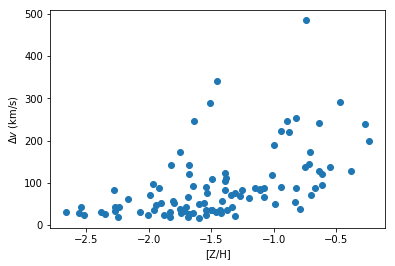

In [17]:
plt.clf()
ax = plt.gca()
#
ax.scatter(h100.ZH, dvs)
#
ax.set_xlabel('[Z/H]')
ax.set_ylabel(r'$\Delta v$ (km/s)')
#
plt.show()